In [1]:
!pip install pandas
!pip install sklearn
!pip install matplotlib

You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\maghican\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Репозиторий !!!!
UCI (UCI Machine Learning Repository)
https://archive.ics.uci.edu/ml/datasets.php
http://econ.sciences-po.fr/thierry-mayer/data
https://towardsdatascience.com/top-sources-for-machine-learning-datasets-bb6d0dc3378b

## https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#economics-and-finance

https://github.com/rsvp/fecon235/blob/master/nb/fred-eurozone.ipynb

Пример решения задачи множественной регрессии с помощью Python

## Загружаем необходимые библиотеки и файл с данными

In [2]:
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#plt.style.use('seaborn-pastel')
print(plt.style.available)
%matplotlib inline
#Загружаем данные из файла
dataset = pd.read_csv('ENB2012_data.csv',decimal=",",delimiter=";")
# Выводим верхние строки таблицы
dataset.head()

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Проверяем на наличие нужных колонок и отсутствие пустых колонок

In [3]:
dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

## Проверяем корректность типов данных

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


## Проверяем на наличие нулевых (NULL) данных

In [5]:
dataset.isnull().values.any()

False

## Определяем размерность данных

In [6]:
dataset.shape

(768, 10)

##  Получим некоторую сводную информацию по всей таблице.
Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [7]:
dataset.describe()

#dataset.groupby('Y1')['Y2'].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Определяем корреляцию между ячейками

Построим корреляционную матрицу. Все ее недиагональные положительнын значения относительно Y1 и Y2

In [8]:
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000e+00,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000e+00,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000e+00,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000e+00,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000e+00,1.861418e-18,0.000000e+00,0.889431,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.213992e-19,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,1.213992e-19,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000e+00,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


## Уберем лишние столбцы

### Еще можно удалить строки или столбцы с пустыми значениями:
    удалить столбцы с такими значениями (dataset = dataset.dropna(axis=1)),
    удалить строки с такими значениями (dataset = dataset.dropna(axis=0)).
### Можно заполнить элементы с пустыми значениями
    dataset = dataset.fillna(dataset.median(axis=0), axis=0)


In [9]:

dataset = dataset.drop(['X2','X4','X7'], axis=1)
dataset.head()

,X1,X3,X5,X6,X8,Y1,Y2
0,0.98,294.0,7.0,2,0,15.55,21.33
1,0.98,294.0,7.0,3,0,15.55,21.33
2,0.98,294.0,7.0,4,0,15.55,21.33
3,0.98,294.0,7.0,5,0,15.55,21.33
4,0.90,318.5,7.0,2,0,20.84,28.28


## Построим диаграмму рассеивания

Text(0.5, 1.0, 'Зависимость Y2 от Y1')

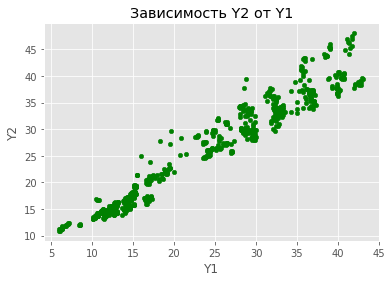

In [49]:
dataset.plot.scatter(x='Y1', y='Y2', color = 'green')
plt.title('Зависимость Y2 от Y1')


Функция scatter_matrix из модуля pandas.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

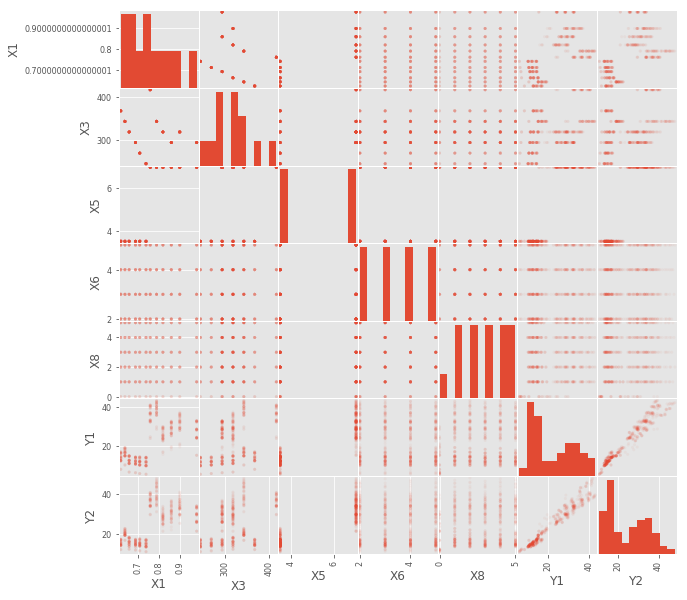

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.05, figsize=(10, 10));

## После обработки данных можно перейти к построению модели.

Для построения модели будем использовать следующие методы:

    Метод наименьших квадратов
    Случайный лес
    Логистическую регрессию
    Метод опорных векторов
    Метод ближайших соседей
Оценку будем производить с помощью коэффициента детерминации (R-квадрат). Данный коэффициент определяется следующим образом:

[LaTeX:R^2 = 1 - \frac{V(y|x)}{V(y)} = 1 - \frac{\sigma^2}{\sigma_y^2}]

, где image — условная дисперсия зависимой величины у по фактору х.
Коэффициент принимает значение на промежутке [LaTeX:[0,1]] и чем он ближе к 1 тем сильнее зависимость.
Ну что же теперь можно перейти непосредственно к построению модели и выбору модели. Давайте поместим все наши модели в один список для удобства дальнейшего анализа:

In [12]:
models = [LinearRegression(), # метод наименьших квадратов
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
	          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
	          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
	          LogisticRegression() # логистическая регрессия
	          ]

## Разбиваем данные на обучающую (30%) и тестовую последовательность(70%) используя train_test_split

In [50]:
#separating independent and dependent variable
trg = dataset[['Y1']] # В качестве управляемых переменных Y1,Y2
trn = dataset.drop(['Y1'], axis=1) # В качестве неуправляемых переменных все X

Xtrain, Xtest, Ytrain, Ytest = train_test_split(trn, trg, test_size=0.3, random_state = 11)
N_train = Xtrain.shape 
N_test = Xtest.shape 
print (N_train, N_test)


#Ytrain
#Xtrain


(537, 6) (231, 6)


## Устанавливаем разные типы регрессии, обучаем модель, проверяем модель на тестовых данных.

### Линейная регрессия

In [33]:
model1 = LinearRegression()

m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
Ypred = model1.predict(Xtest)
print("Линейная регрессия - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Линейная регрессия - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))



Линейная регрессия - правильность на обучающем наборе: 0.96
Линейная регрессия - правильность на тестовом наборе: 0.96


In [51]:
X2 = dataset.iloc[:, 5].values  # dataset.iloc[:, :-1].values Matrix of independent variables -- remove the last column in this data set
Y2 = dataset.iloc[:, 6].values    # Matrix of dependent variables -- just the last column (1 == 2nd column)



### Случайный лес

In [53]:
model1= RandomForestRegressor(n_estimators=100, max_features ='sqrt')
m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
#Ypred = model1.predict(Xtest)

print("Случайный лес - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Случайный лес - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Случайный лес - правильность на обучающем наборе: 1.00
Случайный лес - правильность на тестовом наборе: 0.98


Мы применили метод score к тестовым данным и тестовым ответам и обнаружили, что наша
модель демонстрирует правильность около 72%. Это означает, что модель
выдает правильные прогнозы для 72% наблюдений тестового набора.

## Метод ближайших соседей

In [52]:
# SVR(kernel='linear'), # метод опорных векторов с линейным ядром
# LogisticRegression() # логистическая регрессия

model1= KNeighborsRegressor(n_neighbors=4)
m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
Ypred = model1.predict(Xtest)

print("Ближайших соседей - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Ближайших соседей - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))

Ближайших соседей - правильность на обучающем наборе: 0.98
Ближайших соседей - правильность на тестовом наборе: 0.97


## Метод логистическая регрессия

In [54]:
# логистическая регрессия
# create and configure model
model1 = LogisticRegression(solver='lbfgs')
 	
# create and configure model
#model1 = LogisticRegression(solver='lbfgs', multi_class='ovr')
m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
Ypred = model1.predict(Xtest)

print("Метод опорных векторов с линейным ядром - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Метод опорных векторов с линейным ядром - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [ ]:
#import matplotlib.pyplot as plt

plt.scatter(Xtrain, Ytrain, color = 'green')
plt.scatter(Xtest, Ytest, color = 'red')   
plt.scatter(Xtest, Ypred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(Xtrain, model1.predict(Xtrain), color = 'gray')
plt.title('Temperature based on chirp count')
plt.xlabel('Chirps/minute')
plt.ylabel('Temperature')
plt.show()

# Пример на датасете Бостон

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
r = boston.data.shape
r

In [71]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"

X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True).squeeze()



In [72]:
# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
    

In [73]:
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.exp((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

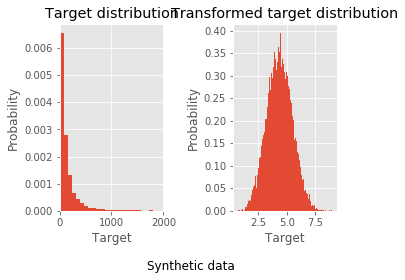

In [74]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, **density_param)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Пример на реальных данных Бостон

In [75]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True).squeeze()

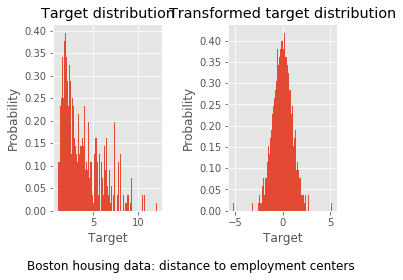

In [76]:
#Делаем заготовку под две картинки
f, (ax0, ax1) = plt.subplots(1, 2)
# Атрибуты первой картинки
ax0.hist(y, bins=100, **density_param)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

# Атрибуты второй картинки
ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# Разбиваем данные на обучающую и тестовую последовательность
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [79]:
#X_train
#y_train

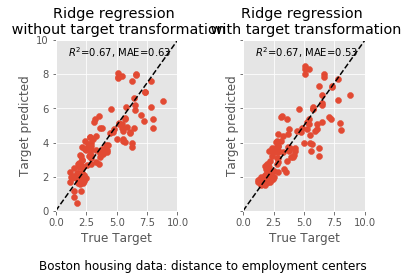

In [80]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
# Определяем тип регрессии Ridge regression
regr = RidgeCV()
# Обучаем модель
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

ax0.scatter(y_test, y_pred)
ax0.plot([0, 10], [0, 10], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 10])
ax0.set_ylim([0, 10])

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=300,
                                    output_distribution='normal'))
# ---------------Обучаем модель----------------------------------------------
regr_trans.fit(X_train, y_train)

y_pred = regr_trans.predict(X_test)

ax1.scatter(y_test, y_pred)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Ridge regression \n with target transformation')
ax1.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

plt.show()

# Пример из книжки (стр. 28). Датасет: Ирисы

In [81]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [82]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))

Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [83]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [84]:
print("Названия ответов: {}".format(iris_dataset['target_names']))

Названия ответов: ['setosa' 'versicolor' 'virginica']


In [85]:
print("Названия признаков: \n{}".format(iris_dataset['feature_names']))

Названия признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [86]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [87]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


In [90]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [91]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))
print("Форма массива target: {}".format(iris_dataset['target'].shape))


Тип массива target: <class 'numpy.ndarray'>
Форма массива target: (150,)


In [92]:
print("Ответы:\n{}".format(iris_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Метрики эффективности модели

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [94]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)


In [95]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (38, 4)
форма массива y_test: (38,)


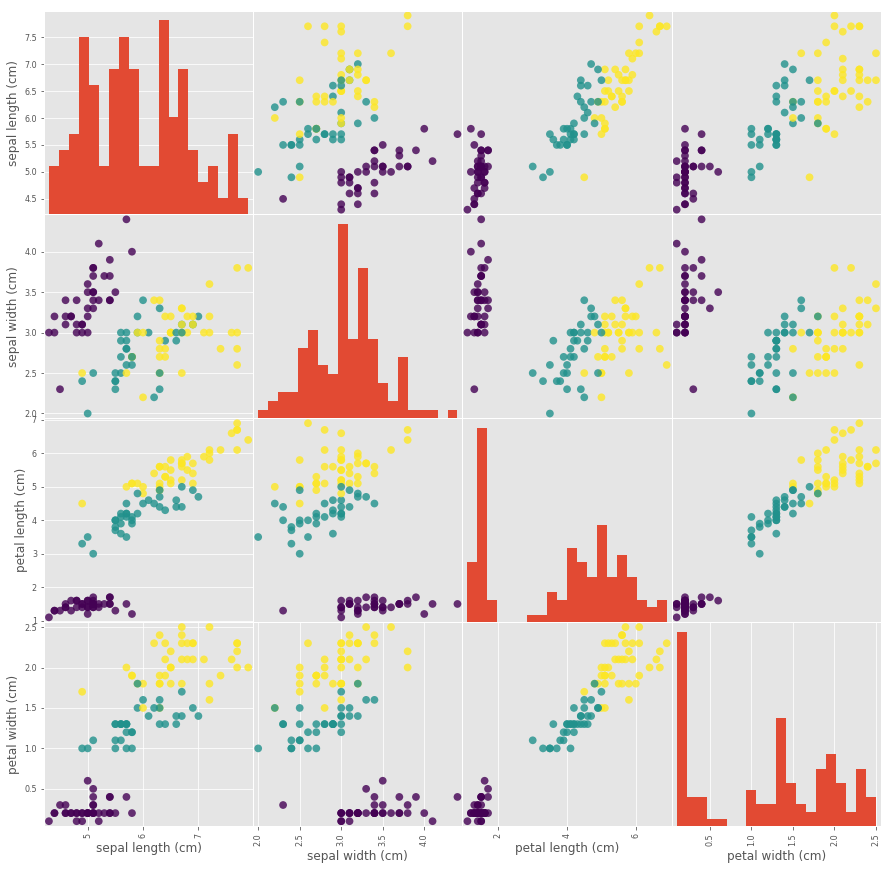

In [99]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
    hist_kwds={'bins': 20}, s=60, alpha=.8)

### Построение модели

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [109]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


### Получение прогнозов
Теперь мы можем получить прогнозы, применив эту модель к новым
данным, по которым мы еще не знаем правильные метки.

In [104]:
X_new = np.array([[5, 2.9, 1, 0.2]])# Создадим новый набор данных/Обратите внимание, что мы записали измерения по одному цветку в
                                    #двумерный массив NumPy, поскольку scikit-learn работает с
                                    #двумерными массивами данных.
print("форма массива X_new: {}".format(X_new.shape))

форма массива X_new: (1, 4)


In [105]:
# Чтобы сделать прогноз, мы вызываем метод predict объекта knn:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(
iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


### Оценка качества модели (стр. 37)
Таким образом, мы можем сделать прогноз для каждого ириса в
тестовом наборе и сравнить его с фактической меткой (уже известным
сортом). Мы можем оценить качество модели, вычислив правильность
(accuracy) – процент цветов, для которых модель правильно
спрогнозировала сорта:

In [106]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Правильность на тестовом наборе: 0.97
